<a href="https://colab.research.google.com/github/tanupunjani/Mastering-tensorflow/blob/main/03_intro_to_CNN_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to convolutional neural network and computer vision with tensorflow

#Computere vision is a practise of writing algorithms that can discover patterns in visual data. Such as camera of a self driving car recognizing a car in front

#Get the data

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

import zipfile 

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-05 18:13:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   131MB/s    in 0.8s    

2021-08-05 18:13:30 (131 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



#Inspect the data (become one with data)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#walk through the pizza_steak directory and file names

for dirpath, dirnames, filenames in os.walk("pizza_steak"):

  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in '{dirpath}'. " )

There are 2 directories and  1 images in 'pizza_steak'. 
There are 2 directories and  1 images in 'pizza_steak/train'. 
There are 0 directories and  750 images in 'pizza_steak/train/pizza'. 
There are 0 directories and  750 images in 'pizza_steak/train/steak'. 
There are 2 directories and  1 images in 'pizza_steak/test'. 
There are 0 directories and  250 images in 'pizza_steak/test/pizza'. 
There are 0 directories and  250 images in 'pizza_steak/test/steak'. 


#Get class names programmitically 

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of classnames from subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


#Visualizing data 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image with matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"{img.shape}") #show the shape of the image

  return img

['2321465.jpg']
(384, 512, 3)


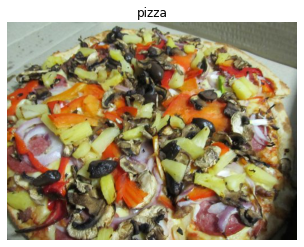

In [8]:
#view the random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

#the images that we have imported are actually giant arrays/ tensors of different pixel values

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[162, 178, 168],
        [163, 179, 169],
        [164, 180, 170],
        ...,
        [ 97, 100,  83],
        [ 97, 100,  83],
        [ 97, 100,  83]],

       [[161, 177, 167],
        [162, 178, 168],
        [163, 179, 169],
        ...,
        [ 98, 101,  84],
        [ 98, 101,  84],
        [ 99, 102,  85]],

       [[162, 178, 168],
        [162, 178, 168],
        [163, 179, 169],
        ...,
        [ 98, 101,  84],
        [ 99, 102,  85],
        [100, 103,  86]],

       ...,

       [[110, 117, 110],
        [113, 120, 113],
        [115, 122, 115],
        ...,
        [  7,   8,   3],
        [  7,   8,   3],
        [  7,   8,   3]],

       [[100, 107, 100],
        [105, 112, 105],
        [110, 117, 110],
        ...,
        [  7,   8,   3],
        [  7,   8,   3],
        [  6,   7,   2]],

       [[ 80,  87,  80],
        [ 90,  97,  90],
        [100, 107, 100],
        ...,
        [  7,   8,   

🔑 #Note : Many machine learning models, perfer the values they work with between 0 and 1. 


# We do this by dividing the img array by 255 as 255 is the maximum pixel values

In [10]:
img/255

array([[[0.63529412, 0.69803922, 0.65882353],
        [0.63921569, 0.70196078, 0.6627451 ],
        [0.64313725, 0.70588235, 0.66666667],
        ...,
        [0.38039216, 0.39215686, 0.3254902 ],
        [0.38039216, 0.39215686, 0.3254902 ],
        [0.38039216, 0.39215686, 0.3254902 ]],

       [[0.63137255, 0.69411765, 0.65490196],
        [0.63529412, 0.69803922, 0.65882353],
        [0.63921569, 0.70196078, 0.6627451 ],
        ...,
        [0.38431373, 0.39607843, 0.32941176],
        [0.38431373, 0.39607843, 0.32941176],
        [0.38823529, 0.4       , 0.33333333]],

       [[0.63529412, 0.69803922, 0.65882353],
        [0.63529412, 0.69803922, 0.65882353],
        [0.63921569, 0.70196078, 0.6627451 ],
        ...,
        [0.38431373, 0.39607843, 0.32941176],
        [0.38823529, 0.4       , 0.33333333],
        [0.39215686, 0.40392157, 0.3372549 ]],

       ...,

       [[0.43137255, 0.45882353, 0.43137255],
        [0.44313725, 0.47058824, 0.44313725],
        [0.45098039, 0

#An end-to-end CNN example

#Steps for this are as follows :
* Load our images
* Preprocess our images
* Create convolutional network to find pattern in our images
* Compile the CNN
* Fit the CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocessing the data (getting the pixel values between 0 and 1 which is called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


#Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)



valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 197ms/step - loss: 0.5793 - accuracy: 0.6827 - val_loss: 0.3863 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4142 - accuracy: 0.8120 - val_loss: 0.3681 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3921 - accuracy: 0.8213 - val_loss: 0.3459 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3683 - accuracy: 0.8447 - val_loss: 0.3133 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3324 - accuracy: 0.8607 - val_loss: 0.3206 - val_accuracy: 0.8780


#If the above cell is taking longer than 10 seconds per epoch to run than you need to change your runtime type and use a GPU. Also rerun the cells again 


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#USing the same model as before

#Important note : You can think of the traininable parameters as the patterns a model can learn from data. The major difference here is that our CNN seeks to sort out and learn the most important patterns in the image. SO even though these are less learnable parameters in CNN, they seem to be more helpful in dechipering different features in an image

#Binary classification : Breaking it down 

* Become one with data (vizualize, vizualize, visualize)
* Preprocess the data (prepared it for our model, the main step here is to scale/normalize it, and turning our data into batches)
* Its important to create a baseline and first of all have a paper to beat its benchmark. And if the benchmark does not exist you need to create one
* Fit the model
* EValuate the model
* Adjust our parameters to improve the model (try to beat our baseline)
* Repeat until satisfied(experiment, experiment, experiment)


#Become one with data

['2599817.jpg']
(512, 512, 3)
['3297714.jpg']
(512, 512, 3)


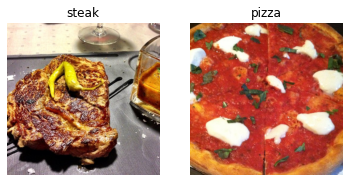

In [13]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [14]:
images, labels = train_data.next()

In [15]:
len(images), len(labels)

(32, 32)

In [16]:
labels[0].shape

()

In [17]:
labels

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

#Create the model (start with the baseline)

#A baseline is a simple model or existing result that you setup when beginning the machine learning project and by experimenting, you try to beat the baseline

In [18]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
#Create the baseline model 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

In [21]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [22]:

# Get a summary of our model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [23]:
#fit the model 
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7813 - accuracy: 0.7367 - val_loss: 0.4853 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3928 - accuracy: 0.8300 - val_loss: 0.3820 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3155 - accuracy: 0.8707 - val_loss: 0.4334 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.2005 - accuracy: 0.9393 - val_loss: 0.4151 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0886 - accuracy: 0.9780 - val_loss: 0.4328 - val_accuracy: 0.8220


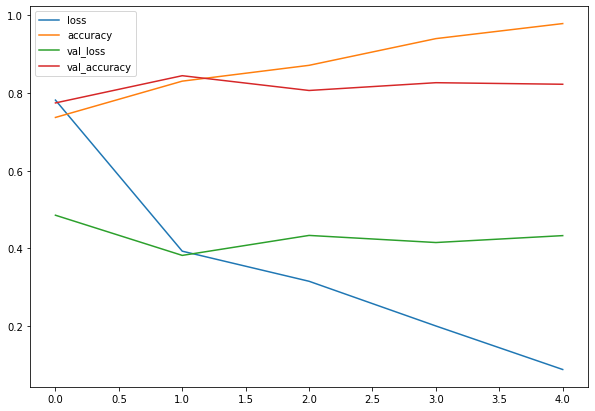

In [24]:

# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [25]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

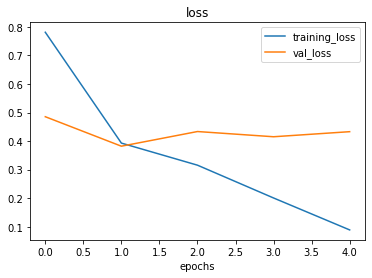

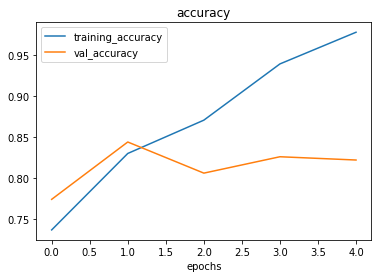

In [26]:
plot_loss_curves(history_4)

#Looking the first figure in D's notebook, the loss decreases on the training data but does not seem to decrease on the validation data. It slightly increases on the test/valid data which is also called overfitting.
## Our model is perfoeming "too well" on the training data which needs to be observed

#Adjust the model parameters

##Fitting the machine learning model comes in 3 ways

0. Create the baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

##Ways to induce overfitting

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to our output of flattened layer

##Reduce overfitting

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data

#Maxpool2D - It finds the most important features in our layer. Condensing the 4 pixel into one. See CNN explainer for more information

#reducing overfitting means regularization - this is an important term 

In [27]:
#Creating the model - this is going to be our new baseline

model_5 = Sequential([
    Conv2D(10, 3, activation=r"relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [28]:
#compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [29]:
#Fit the model

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6676 - accuracy: 0.5633 - val_loss: 0.5937 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4910 - accuracy: 0.7747 - val_loss: 0.3936 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4216 - accuracy: 0.8007 - val_loss: 0.3565 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3924 - accuracy: 0.8293 - val_loss: 0.3408 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3874 - accuracy: 0.8293 - val_loss: 0.3277 - val_accuracy: 0.8580


In [30]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

#Here the maxpool2D have learned only the most important features of the conv layers and condensed the parameters
Important note

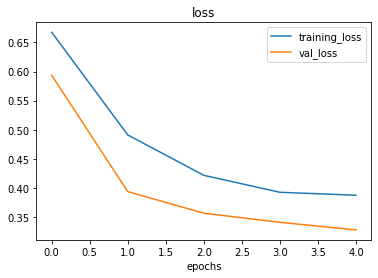

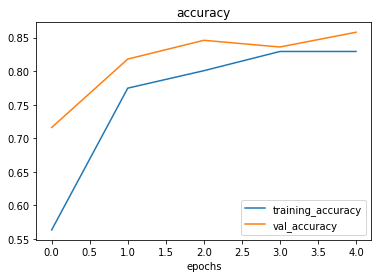

In [32]:
plot_loss_curves(history_5)

#Introducing Data augmentation 

In [33]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,  #how much do you want to rotate an image ?
                                             shear_range = 0.2, #how much do you want to shear an image,
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range = 0.2, #move your image around on the x-axis
                                             height_shift_range=0.2, #move your image around y-axis
                                             horizontal_flip = True) #do you want to flip an image ?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

>🤔 **Question** : what is data augmentation ?

Data augmentation is the process of altering our training data so that they can have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar

In [34]:
#Import the data from the directory and augment it 
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demonstration purpose

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


##Data augmentation is performed only on training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into our model

#visualize the augmented data

In [35]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note : labels are not augmented and only data images are 

Image number 29


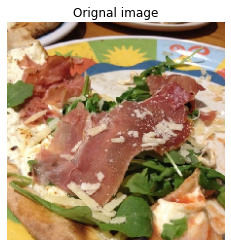

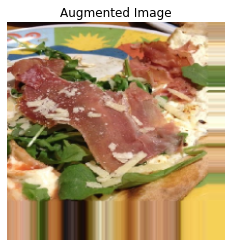

In [36]:
#show orignal image and augmented

import random
random_number = random.randint(0, 32) #our batch sizes are 32
print(f"Image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Orignal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

#shuffling the data improves model's performance 

In [37]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [38]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 22s 455ms/step - loss: 0.6501 - accuracy: 0.6120 - val_loss: 0.5503 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5225 - accuracy: 0.7600 - val_loss: 0.3833 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5139 - accuracy: 0.7553 - val_loss: 0.3542 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4817 - accuracy: 0.7693 - val_loss: 0.3719 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4642 - accuracy: 0.7973 - val_loss: 0.4522 - val_accuracy: 0.7700


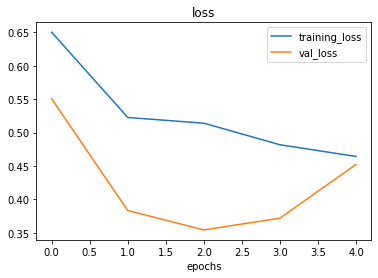

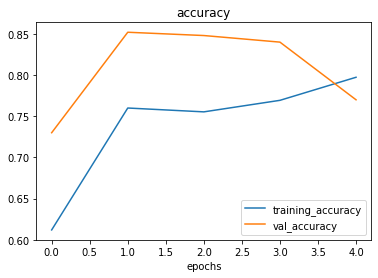

In [39]:
plot_loss_curves(history_7)

> 🔑  **Note** : When shuffling the training data, the model gets exposed to all kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak )

#Repeat until satisfied

Since we have already beaten our baseline , there are a few things we could try to continue to improve our model

* Increase the number of model layers (eg add more Conv2D/MaxPool2D layers)
* Increase the numner of filters in each CNN layer (eg from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning 
* Get more data (give the model more opportunities to learn)
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case

#Making predictions on our trained model with custom data

In [40]:
#Check the classes we are working with 
print(class_names)

['pizza' 'steak']


--2021-08-05 18:22:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-05 18:22:14 (42.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



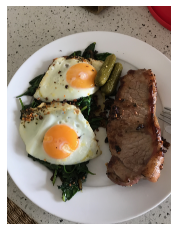

In [41]:
#view our sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [42]:
#Check shape 
steak.shape

(4032, 3024, 3)

# When you make prediction on a trained neural network model, make sure the custom data you are making predictions on is in the same format as the training data on which the model is actually trained

##Basically you want the image shape to be between 0 and 1 - same like the normalized trained data of the model 

In [43]:
#Create a function to import our custom image, resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):

  """
  Reads an image from file name and convert it into a tensor and reshapes it to 
  (img_shape, img_shape, colour_channels).
  """

  #Read in the image
  img = tf.io.read_file(filename)

  #Decode it

  img = tf.image.decode_image(img)

  #Resize

  img = tf.image.resize(img, size=[img_shape,img_shape])

  #Rescale the image (get all the values between 0 and 1)
  img = img/255.

  return img

In [44]:
#load the image and run this function
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [46]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.91319567]], dtype=float32)

In [47]:
###We have to round this array to know whether its 0 or 1 - meaning, whether its pizza or steak
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [50]:
#Plot the predictions as well 
def pred_and_plot(model, filename, class_names=class_names):
  """
  mports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

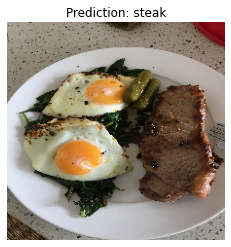

In [51]:
pred_and_plot(model_7, "03-steak.jpeg")

--2021-08-05 18:49:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-08-05 18:49:06 (54.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



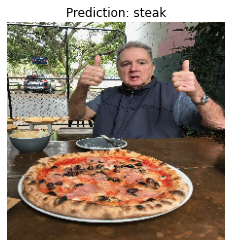

In [52]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

#Making multi-class Image classification

* Become one with data
* Preprocess data
* Build the model
* Fit the model 
* Evauate the model
* Adjust different hyperparameters and improve the model 
* Repeat until satisfied


In [53]:
#Become one with data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-05 19:24:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   273MB/s    in 1.8s    

2021-08-05 19:24:49 (273 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [54]:
#walk through 10 classes of food
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

2 directories and 0 images in '10_food_classes_all_data'.
10 directories and 0 images in '10_food_classes_all_data/train'.
0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
0 directories and 750 images in '10_food_classes_all_data/train/steak'.
0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
10 directories and 0 images in '10_food_classes_all_data/test'.
0 directories and 250 images in '10_food_classes_all_da

In [55]:
#Setup test and train directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [56]:
#Getting the classnames

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3501325.jpg']
(512, 512, 3)


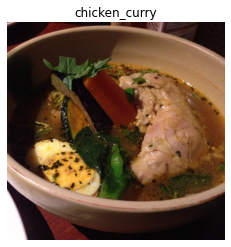

In [57]:
#Visualizing what we sorted 
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#Preprocessing the data 

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocessing the data (getting the pixel values between 0 and 1 which is called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

#Setup path to our directories
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"


#Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)



test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [66]:
#Build a CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile our CNN
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.1506 - accuracy: 0.2057 - val_loss: 1.9959 - val_accuracy: 0.2812
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.9275 - accuracy: 0.3265 - val_loss: 1.8795 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.6893 - accuracy: 0.4227 - val_loss: 1.8748 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 1.1261 - accuracy: 0.6288 - val_loss: 2.2029 - val_accuracy: 0.3196
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.5047 - accuracy: 0.8424 - val_loss: 2.9056 - val_accuracy: 0.2800


In [67]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 2.9056 - accuracy: 0.2800


[2.9056015014648438, 0.2800000011920929]

#check out the loss curves 

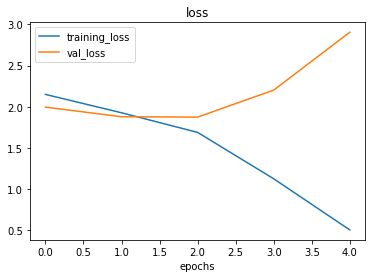

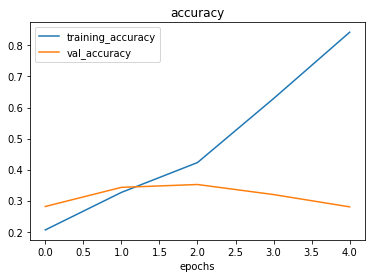

In [68]:
plot_loss_curves(history=history_8)

#our model is overfitting - thats what the loss curves tell us. It performs poorly on unseen data and increases loss 

#Adjust the model's hyperparameters - reduce overfitting / beat our baseline

###It is clear that our model is learning something but its not generalizing well to unseen data (overfitting).

###Ways to try fixing it 
* **Get more data** - having more data gives model more chance to learn diverse patterns

* **Simplify the model** - If your current model is overfitting the data, that means its way too complicated. You can simplify this by reducing the number of hidden units or reducing the number of layers

* **Use Data Augmentation** - Data augmentation manipulates the data in such a way to add more diversity to it (without altering the orignal data)

* **Use Transfer Learning** - Transfer learning leverages the pattern another model has learned on similar data to your own and allows you to use those patterns on your own dataset

Note - start with simple so we will start with simplifying the model

In [70]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 186ms/step - loss: 2.0655 - accuracy: 0.2659 - val_loss: 1.9567 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.7521 - accuracy: 0.4096 - val_loss: 1.9156 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.3728 - accuracy: 0.5540 - val_loss: 2.0211 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.8451 - accuracy: 0.7447 - val_loss: 2.2516 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 42s 179ms/step - loss: 0.4300 - accuracy: 0.8880 - val_loss: 2.6319 - val_accuracy: 0.3024


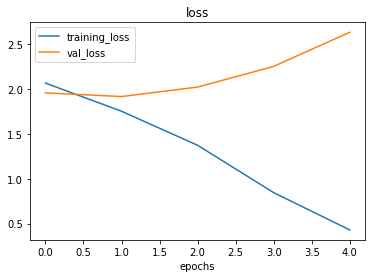

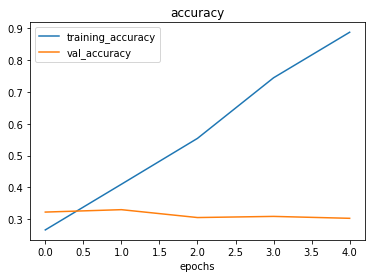

In [72]:
plot_loss_curves(history=history_9)

#This didnt work so we will try data augmentation

In [73]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,  #how much do you want to rotate an image ?
                                             shear_range = 0.2, #how much do you want to shear an image,
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range = 0.2, #move your image around on the x-axis
                                             height_shift_range=0.2, #move your image around y-axis
                                             horizontal_flip = True) #do you want to flip an image ?

#Import the data from the directory and augment it 
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=False) #for demonstration purpose


Augmented training data
Found 7500 images belonging to 10 classes.


In [74]:
#Lets create the model and fit it on augmented data
model_10 = tf.keras.models.clone_model(model_8)

#compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [75]:
#Fit the model 
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 472ms/step - loss: 2.3318 - accuracy: 0.0731 - val_loss: 2.3013 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.3427 - accuracy: 0.0788 - val_loss: 2.3020 - val_accuracy: 0.1288
Epoch 3/5
235/235 [==============================] - 110s 468ms/step - loss: 2.3043 - accuracy: 0.0603 - val_loss: 2.3017 - val_accuracy: 0.1048
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 2.3040 - accuracy: 0.0892 - val_loss: 2.3009 - val_accuracy: 0.1156
Epoch 5/5
235/235 [==============================] - 111s 472ms/step - loss: 2.3035 - accuracy: 0.0919 - val_loss: 2.2968 - val_accuracy: 0.1440


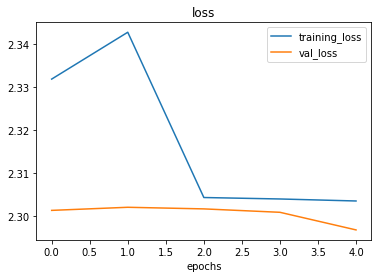

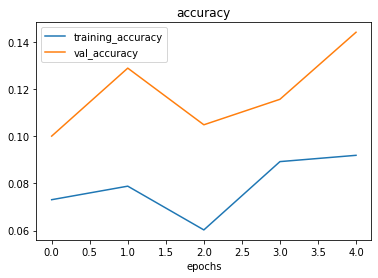

In [76]:
plot_loss_curves(history_10)

# Loss curves are much closer to each other than the baseline model 

#7. Repeat until satisfied 

#We could keep going here.....continually trying to bring our loss curves closer together and trying to improve our model's performance.

How ?

By running lots of experiments, namely :

* restructuring our model's architecture (increase hidden layers/units)
* adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (10 epochs)
* transfer learning

In [80]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

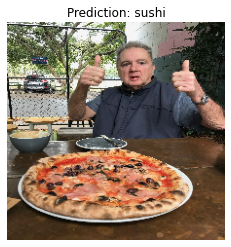

In [81]:

# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

In [82]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-08-05 23:02:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-08-05 23:02:11 (63.4 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2021-08-05 23:02:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

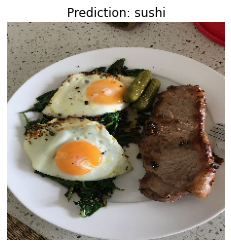

In [83]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

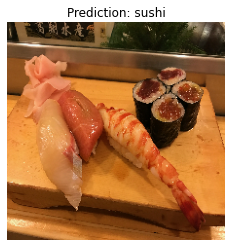

In [84]:

pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)


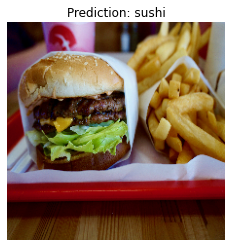

In [85]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

In [86]:
#Saving and loading our model 
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [87]:
#load it back
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 2.2968 - accuracy: 0.1440


[2.2967827320098877, 0.14399999380111694]

In [88]:
#Compare this model with our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 2.2968 - accuracy: 0.1440


[2.2967824935913086, 0.14399999380111694]